# LAB QX01 Quantum Circuits

This objective of this lab is to introduce the basics of quantum computing : 
- How to build simple circuits and their difference with classic binary circuits
- How to build an addition circuit
- Build circuits with quantic gates and check some properties seen in QX01 courses 
- Check the probabilities of quantum states 

Along this lab, we will use Qiskit package to design and simulate quantum circuits. In order to install this package :
- Open a conda prompt terminal
- pip3 install qiskit 
- pip3 install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

First, import these packages required for this lab :

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram


## 1. Your first quantum circuit <a id="first-circuit"></a>

In a quantum circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs.

In [2]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

This circuit, which we have called `qc_output`, is created by Qiskit using `QuantumCircuit`. The number `n_q` defines the number of qubits in the circuit. With `n_b` we define the number of output bits we will extract from the circuit at the end.

The extraction of outputs in a quantum circuit is done using an operation called `measure`. Each measurement tells a specific qubit to give an output to a specific output bit. The following code adds a `measure` operation to each of our eight qubits. The qubits and bits are both labelled by the numbers from 0 to 7 (because that’s how programmers like to do things). The command `qc.measure(j,j)` adds a measurement to our circuit `qc` that tells qubit `j` to write an output to bit `j`.

In [3]:
for j in range(n):
    qc_output.measure(j,j)

Now that our circuit has something in it, let's take a look at it.

In [4]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

Qubits are always initialized to give the output ```0```. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always ```00000000```: a ```0``` from each qubit.

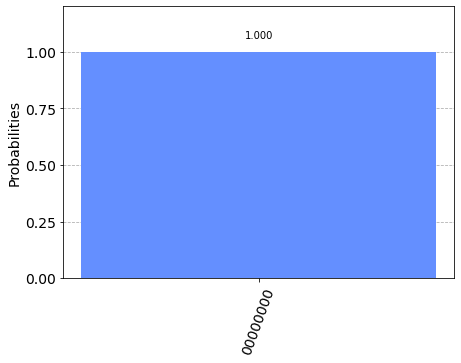

In [5]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results. In this case, since we aren’t doing anything quantum, we get just the ```00000000``` result with certainty.

Note that this result comes from a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Simulations are only possible for small numbers of qubits (~30 qubits), but they are nevertheless a very useful tool when designing your first quantum circuits. To run on a real device you simply need to replace ```Aer.get_backend('qasm_simulator')``` with the backend object of the device you want to use. 

## 2. Encoding an input 


Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: ```0``` becomes ```1``` and ```1``` becomes ```0```. For qubits, it is an operation called ```x``` that does the job of the NOT.

Below we create a new circuit dedicated to the job of encoding and call it `qc_encode`. For now, we only specify the number of qubits.

In [9]:
qc_encode = QuantumCircuit(n)
qc_encode.x(0)
qc_encode.x(3)
qc_encode.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────

Extracting results can be done using the circuit we have from before: `qc_output`. Adding the two circuits using `qc_encode + qc_output` creates a new circuit with everything needed to extract an output added at the end.

In [10]:
qc = qc_encode + qc_output
qc.draw()

<ipython-input-10-ad98d0e2b0e2>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output
/usr/local/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌───┐               ┌─┐   
q_0: ┤ X ├───────────────┤M├───
     └───┘┌─┐            └╥┘   
q_1: ─────┤M├─────────────╫────
          └╥┘┌─┐          ║    
q_2: ──────╫─┤M├──────────╫────
     ┌───┐ ║ └╥┘          ║ ┌─┐
q_3: ┤ X ├─╫──╫───────────╫─┤M├
     └┬─┬┘ ║  ║           ║ └╥┘
q_4: ─┤M├──╫──╫───────────╫──╫─
      └╥┘  ║  ║ ┌─┐       ║  ║ 
q_5: ──╫───╫──╫─┤M├───────╫──╫─
       ║   ║  ║ └╥┘┌─┐    ║  ║ 
q_6: ──╫───╫──╫──╫─┤M├────╫──╫─
       ║   ║  ║  ║ └╥┘┌─┐ ║  ║ 
q_7: ──╫───╫──╫──╫──╫─┤M├─╫──╫─
       ║   ║  ║  ║  ║ └╥┘ ║  ║ 
c: 8/══╩═══╩══╩══╩══╩══╩══╩══╩═
       4   1  2  5  6  7  0  3

Now we can run the combined circuit and look at the results.

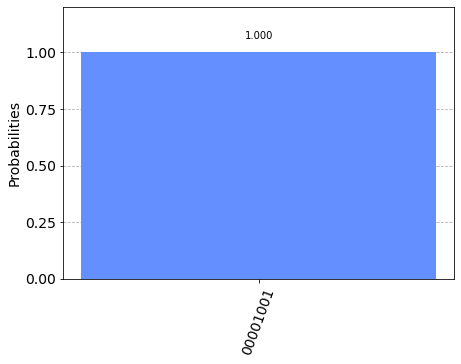

In [11]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Now our computer outputs the string ```10000000``` instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. Specifically, it means that qubit 7 is telling us about how many $2^7$s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

Now try out writing another number for yourself. You could do your age, for example. Just use a search engine to find out what the number looks like in binary (if it includes a ‘0b’, just ignore it), and then add some 0s to the left side if you are younger than 64.

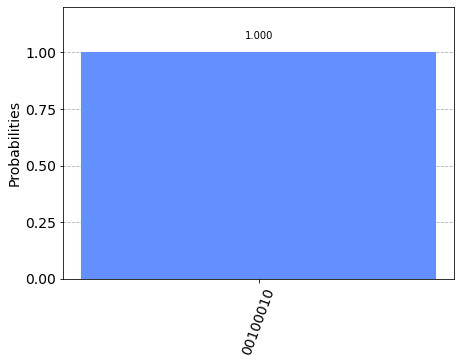

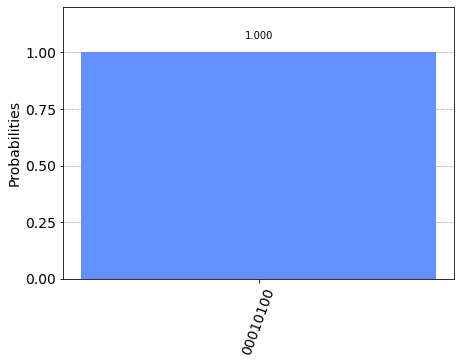

In [11]:
#################
## your code here 
#################

## 3. Quantum Gates

Now, we try the following :
- To see single qubit gates and integrate them in simple circuits
- Visualize the probability output 
- Cascade of Pauli gates 

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

In Qiskit, create a short circuit to verify this:

In [16]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

Let's see the result of the above circuit. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

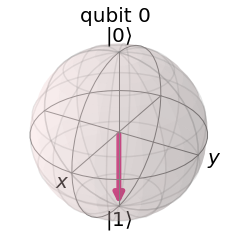

In [17]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

### 3.1 The Y & Z-gates  <a id="ynzgatez"></a>
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.

Below is a widget that displays a qubit’s state on the Bloch sphere, pressing one of the buttons will perform the gate on the qubit:

In [18]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

- Now, try to apply the Y and Z-gates to your circuit.
- Try many combinations, such XYZ, ZYX
- Draw the circuits 
- Simulate the circuit and visualize the probabilities

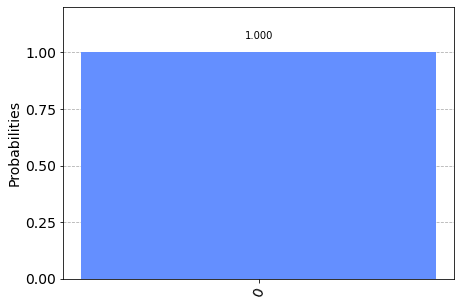

In [22]:
#############
## your code here 
####################


You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two _eigenstates_ of the Z-gate. In fact, the _computational basis_ (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the Z-basis. This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Another less commonly used basis is that formed by the eigenstates of the Y-gate. These are called:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

As an exercise, calculate these. There are in fact an infinite number of bases; to form one, we simply need two orthogonal vectors.

### Quick Exercises
1. Verify that $|+\rangle$ and $|-\rangle$ are in fact eigenstates of the X-gate.
2. What eigenvalues do they have? 
3. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

Using only the Pauli-gates it is impossible to move our initialised qubit to any state other than $|0\rangle$ or $|1\rangle$, i.e. we cannot achieve superposition. This means we can see no behaviour different to that of a classical bit. To create more interesting states we will need more gates!


################
### Responses here
#####################

### 3.2 The Hadamard Gate  <a id="hgate"></a>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

You can play around with these gates using the widget below:

In [23]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

- Try now to apply the H-gate on one qubit (initialized to |0>) to simulate the circuit to get the probabilities of the output state |+>. 

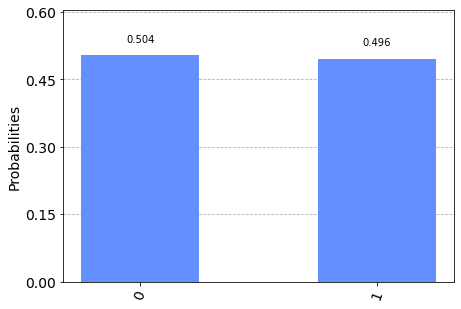

In [26]:
#################
### your code here
###################


### Quick Exercise
1. Write the H-gate as the outer products of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.
2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.
3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).



##########################
## Responses here
########################@


### 3.3 Digression: Measuring in Different Bases  <a id="measuring"></a>
We have seen that the Z-axis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

And after measurement, the superposition is destroyed. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

In [34]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

In the quick exercises above, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:

$$ X = HZH $$

Starting in the Z-basis, the H-gate switches our qubit to the X-basis, the Z-gate peforms a NOT in the X-basis, and the final H-gate returns our qubit to the Z-basis. We can verify this always behaves like an X-gate by multiplying the matrices:

$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$

Following the same logic, we have created an X-measurement by transforming from the X-basis to the Z-basis before our measurement. Since the process of measuring can have different effects depending on the system (e.g. some systems always return the qubit to $|0\rangle$ after measurement, whereas others may leave it as the measured state), the state of the qubit post-measurement is undefined and we must reset it if we want to use it again.

Try now to simulate the output and its probability:

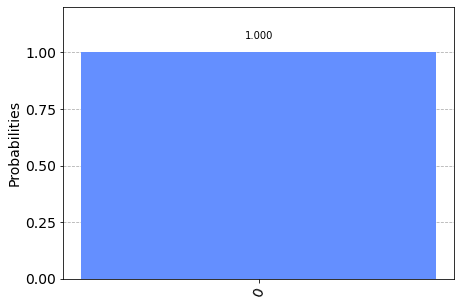

In [33]:
#########
### code here
################


## 4. Adder with quantum circuits  

To look at turning inputs into outputs, we need a problem to solve. Let’s do some basic maths. In primary school, you will have learned how to take large mathematical problems and break them down into manageable pieces. For example, how would you go about solving the following?

```
   9213
+  1854
=  ????
```

One way is to do it digit by digit, from right to left. So we start with 3+4
```
   9213
+  1854
=  ???7
```

And then 1+5
```
   9213
+  1854
=  ??67
```

Then we have 2+8=10. Since this is a two digit answer, we need to carry the one over to the next column.

```
   9213
+  1854
=  ?067
   ¹ 
```

Finally we have 9+1+1=11, and get our answer

```
   9213
+  1854
= 11067
   ¹ 
```

This may just be simple addition, but it demonstrates the principles behind all algorithms. Whether the algorithm is designed to solve mathematical problems or process text or images, we always break big tasks down into small and simple steps.

To run on a computer, algorithms need to be compiled down to the smallest and simplest steps possible. To see what these look like, let’s do the above addition problem again but in binary.


```
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

Note that the second number has a bunch of extra 0s on the left. This just serves to make the two strings the same length.

Our first task is to do the 1+0 for the column on the right. In binary, as in any number system, the answer is 1. We get the same result for the 0+1 of the second column.

```
   10001111111101
+  00011100111110

=  ????????????11 
```

Next, we have 1+1. As you’ll surely be aware, 1+1=2. In binary, the number 2 is written ```10```, and so requires two bits. This means that we need to carry the 1, just as we would for the number 10 in decimal.

```
   10001111111101
+  00011100111110
=  ???????????011 
             ¹ 
```

The next column now requires us to calculate ```1+1+1```. This means adding three numbers together, so things are getting complicated for our computer. But we can still compile it down to simpler operations, and do it in a way that only ever requires us to add two bits together. For this, we can start with just the first two 1s.

```
   1
+  1
= 10
```

Now we need to add this ```10``` to the final ```1``` , which can be done using our usual method of going through the columns.

```
  10
+ 01
= 11
```

The final answer is ```11``` (also known as 3).

Now we can get back to the rest of the problem. With the answer of  ```11```, we have another carry bit.

```
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

So now we have another 1+1+1 to do. But we already know how to do that, so it’s not a big deal.

In fact, everything left so far is something we already know how to do. This is because, if you break everything down into adding just two bits, there are only four possible things you’ll ever need to calculate. Here are the four basic sums (we’ll write all the answers with two bits to be consistent).

```
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

This is called a *half adder*. If our computer can implement this, and if it can chain many of them together, it can add anything.

### 4.1 Adding with Qiskit <a id="adding-qiskit"></a>

Let's make our own half adder using Qiskit. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

The two bits we want to add are encoded in the qubits 0 and 1. The above example encodes a ```1``` in both these qubits, and so it seeks to find the solution of ```1+1```. The result will be a string of two bits, which we will read out from the qubits 2 and 3. All that remains is to fill in the actual program, which lives in the blank space in the middle.

The dashed lines in the image are just to distinguish the different parts of the circuit (although they can have more interesting uses too). They are made by using the `barrier` command.

The basic operations of computing are known as logic gates. We’ve already used the NOT gate, but this is not enough to make our half adder. We could only use it to manually write out the answers. Since we want the computer to do the actual computing for us, we’ll need some more powerful gates.

To see what we need, let’s take another look at what our half adder needs to do.

```
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

The rightmost bit in all four of these answers is completely determined by whether the two bits we are adding are the same or different. So for ```0+0``` and ```1+1```, where the two bits are equal, the rightmost bit of the answer comes out ```0```. For ```0+1``` and ```1+0```, where we are adding different bit values, the rightmost bit is ```1```.

To get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, in the study of digital computation, this is called an XOR gate.

| Input 1 | Input 2 | XOR Output |
|:-------:|:-------:|:------:|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

In quantum computers, the job of the XOR gate is done by the controlled-NOT gate. Since that's quite a long name, we usually just call it the CNOT. In Qiskit its name is ```cx```, which is even shorter. In circuit diagrams, it is drawn as in the image below.

In [35]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

This is applied to a pair of qubits. One acts as the control qubit (this is the one with the little dot). The other acts as the *target qubit* (with the big circle).

There are multiple ways to explain the effect of the CNOT. One is to say that it looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes ```0``` if they are the same, and ```1``` if they are different.

<img src="images/cnot_xor.svg">

Another way of explaining the CNOT is to say that it does a NOT on the target if the control is ```1```, and does nothing otherwise. This explanation is just as valid as the previous one (in fact, it’s the one that gives the gate its name).

Try the CNOT out for yourself by trying each of the possible inputs (00,01,10,11) and compute the logic table.


In [43]:
##################
### code here 
#######################


┌───┐        
q_0: ┤ X ├──■─────
     ├───┤┌─┴─┐┌─┐
q_1: ┤ X ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

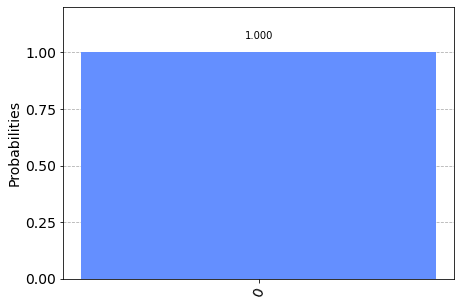


- The CNOT calculates whether the input values are different and finds that they are, which means that it wants to output ```1```. It does this by writing over the state of qubit 1 (which, remember, is on the left of the bit string), turning ```01``` into ```11```.

- The CNOT sees that qubit 0 is in state ```1```, and so applies a NOT to qubit 1. This flips the ```0``` of qubit 1 into a ```1```, and so turns ```01``` into ```11```.

Here is a table showing all the possible inputs and corresponding outputs of the CNOT gate:

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            |        00       |
| 01            |        01      |
| 10            |        01       |
| 11            |        00      |

For our half adder, we don’t want to overwrite one of our inputs. Instead, we want to write the result on a different pair of qubits. For this, we can use two CNOTs.

- Implement the circuit below :

In [48]:
#################
## code here 
## Before executing this cell, please copy the circuit
################


┌───┐             
q_0: ┤ X ├──■──────────
     └───┘  │          
q_1: ───────┼────■─────
          ┌─┴─┐┌─┴─┐┌─┐
q_2: ─────┤ X ├┤ X ├┤M├
      ┌─┐ └───┘└───┘└╥┘
q_3: ─┤M├────────────╫─
      └╥┘            ║ 
c: 2/══╩═════════════╩═
       1             0

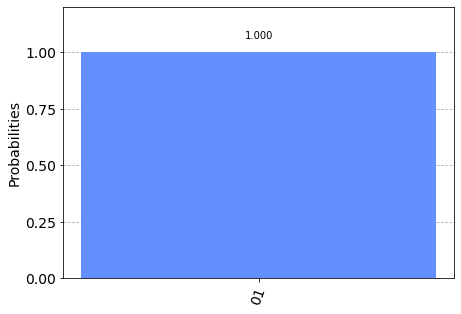

We are now halfway to a fully working half adder. We just have the other bit of the output left to do: the one that will live on qubit 3.

If you look again at the four possible sums, you’ll notice that there is only one case for which this is ```1``` instead of ```0```: ```1+1```=```10```. It happens only when both the bits we are adding are ```1```.

To calculate this part of the output, we could just get our computer to look at whether both of the inputs are ```1```. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of ```1``` for this case only, giving us the output we need.

For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state ```1```. This new gate is called the *Toffoli*. For those of you who are familiar with Boolean logic gates, it is basically an AND gate.

In Qiskit, the Toffoli is represented with the `ccx` command.

- Implement the half adder as shown in the circuit below and fill the table :

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            |      00        |
| 01            |      01        |
| 10            |      01        |
| 11            |      10        |



In [56]:
###########
## code here 
## Before executing this cell, please copy the circuit
##############



┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1



- Simulate the cricuit and compute the output probability

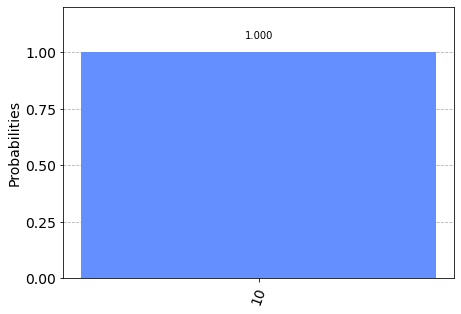

The result is ```10```, which is the binary representation of the number 2. We have built a computer that can solve the famous mathematical problem of 1+1!

Now you can try it out with the other three possible inputs, and show that our algorithm gives the right results for those too.



The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value ```1```. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.

As we'll see, in quantum computing we split the atom.